# WG - Gesucht Data Analysis 
#### Step 2: Makro Analysis

##### This notebook explores the data of the WG-Gesucht dataset. The process includes the following: 
- Looking at the distribution of the room ads in Berlin 
- The average rent, room size in Berlin (Median and Arithemntic Mean)
- Minimum and Maximum rent and room size in Berlin 
- The ads which are first and last published 
- The number of ads with an unlimeted and limited contract 
- How many shared flats for student are available, the average roommate age and roommates are in the Apartments

In [36]:
import pandas as pd
import os 
from openpyxl import load_workbook
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import src.language as ln
import src.settings as st
import matplotlib
import numpy as np

In [37]:
df = pd.read_parquet('Data/apartmentsBerlinDataCleaned.parquet')

# Settings
langauge = 'german'
font = {'fontname': 'Calibri'}
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Calibri"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
pd.options.mode.copy_on_write = True


#### Step 2.1: Distribution of rooms and rents in Berlin

In [38]:
# Calculate roughly price per square meter
df.loc[:, 'price_per_sqm'] = df['total_rent'] / df['room_size']

In [39]:
df_overview_berlin = df[['apartmentID', 'title', 'room_size', 'total_rent', 'price_per_sqm']]

In [40]:
labels_roomsize= ln.get_labels(1, langauge)  
labels_rent = ln.get_labels(2, langauge)  

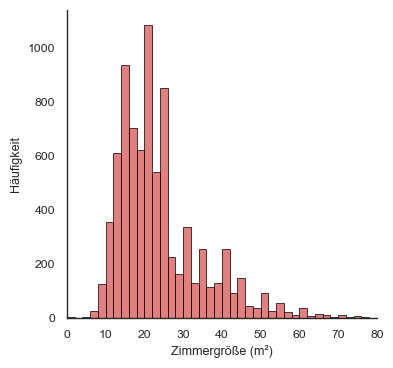

In [41]:
sns.set(style="white")  # Set the style of the plots with Seaborn
sns.set_context("paper")
#sns.color_palette("flare")
plt.figure(figsize=(4, 4))

bins=range(0, 80, 2)
x_vaiable = 'room_size'

# Room Distribution
sns.histplot(data=df_overview_berlin, x=x_vaiable, bins=bins, color = '#dc5454', edgecolor='black')
#plt.title(labels_roomsize['title'])
plt.xlabel(labels_roomsize['x_label'], fontsize=9)
plt.ylabel(labels_roomsize['y_label'], fontsize=9)
plt.xlim(0, 80)
sns.despine()

Get the databasis to create the same plot in excel

In [42]:
# Calculate the histogram bins and frequencies
hist, bins = np.histogram(df_overview_berlin[x_vaiable], bins=bins)

# Create a DataFrame with the histogram data
histogram_data = pd.DataFrame({'Bin': bins[:-1], 'Frequency': hist})

file_path = 'data/output/makro_analysis.xlsx'
sheet_name = 'Room Size Distribution'

# Überprüfe, ob die Datei existiert und entferne das Blatt, falls es existiert
if os.path.exists(file_path):
    workbook = load_workbook(file_path)
    if sheet_name in workbook.sheetnames:
        del workbook[sheet_name]
    workbook.save(file_path)

with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    histogram_data.to_excel(writer, sheet_name=sheet_name, index=False)

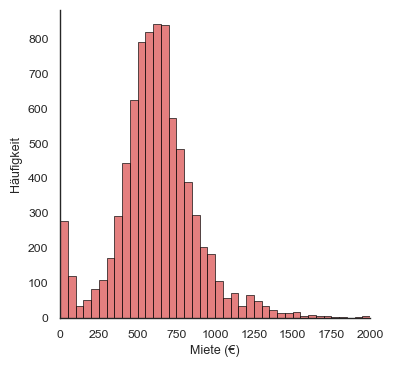

In [43]:
sns.set(style="white")  # Set the style of the plots with Seaborn
sns.set_context("paper")
plt.figure(figsize=(4, 4))

# Prize Distribution
bins = range(0, 2250, 50)
x_vaiable = 'total_rent'

# Rent Distribution
sns.histplot(data=df_overview_berlin, x=x_vaiable, bins=bins, color = '#dc5454', edgecolor='black')
#plt.title(labels_roomsize['title'])
plt.xlabel(labels_rent['x_label'], fontsize=9)
plt.ylabel(labels_rent['y_label'], fontsize=9)
plt.xlim(0, 2000)
sns.despine()

Get the databasis to create the same plot in excel

In [44]:
# Calculate the histogram bins and frequencies
hist, bins = np.histogram(df_overview_berlin[x_vaiable], bins=bins)

# Create a DataFrame with the histogram data
histogram_data = pd.DataFrame({'Bin': bins[:-1], 'Frequency': hist})

file_path = 'data/output/makro_analysis.xlsx'
sheet_name = 'Rent Distribution'

# Überprüfe, ob die Datei existiert und entferne das Blatt, falls es existiert
if os.path.exists(file_path):
    workbook = load_workbook(file_path)
    if sheet_name in workbook.sheetnames:
        del workbook[sheet_name]
    workbook.save(file_path)

with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    histogram_data.to_excel(writer, sheet_name=sheet_name, index=False)

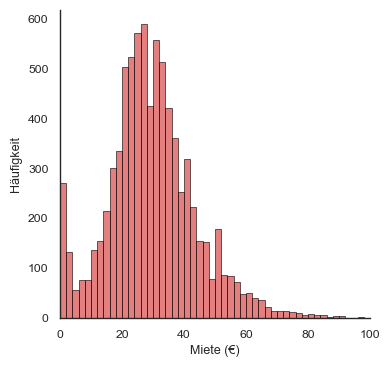

In [45]:
sns.set(style="white")  # Set the style of the plots with Seaborn
sns.set_context("paper")
plt.figure(figsize=(4, 4))

# Prize Distribution
bins = range(0, 100, 2)
x_vaiable = 'price_per_sqm'

# Rent Distribution
sns.histplot(data=df_overview_berlin, x=x_vaiable, bins=bins, color = '#dc5454', edgecolor='black')
#plt.title(labels_roomsize['title'])
plt.xlabel(labels_rent['x_label'], fontsize=9)
plt.ylabel(labels_rent['y_label'], fontsize=9)
plt.xlim(0, 100)
sns.despine()

In [46]:
# Calculate the histogram bins and frequencies
hist, bins = np.histogram(df_overview_berlin[x_vaiable], bins=bins)

# Create a DataFrame with the histogram data
histogram_data = pd.DataFrame({'Bin': bins[:-1], 'Frequency': hist})

file_path = 'data/output/makro_analysis.xlsx'
sheet_name = 'Squaremeter Price Distribution'

# Überprüfe, ob die Datei existiert und entferne das Blatt, falls es existiert
if os.path.exists(file_path):
    workbook = load_workbook(file_path)
    if sheet_name in workbook.sheetnames:
        del workbook[sheet_name]
    workbook.save(file_path)

with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    histogram_data.to_excel(writer, sheet_name=sheet_name, index=False)

#### Step 2.2: Analyzing Room Sizes and Rental Prices in Berlin: Averages and Extremes

For the follwing, you can choose excluding the top and bottom percentages of the data.

For example 5%.  

In [47]:
# Settings:  
exclude_top_bottom_10percent = True  # Set to True to exclude, or False to include all data
columns_to_trim = ['room_size', 'total_rent', 'price_per_sqm']
bottom_quantile = 0.02
top_quantile = 0.98

In [48]:
def trim_dataset_all_columns(df, columns, exclude_top_bottom_10percent, bottom_quantile, top_quantile):

    if exclude_top_bottom_10percent:
        conditions = [df[col].between(df[col].quantile(bottom_quantile), df[col].quantile(top_quantile)) for col in columns]
        combined_condition = conditions[0]
        for condition in conditions[1:]:
            combined_condition &= condition
        return df[combined_condition]
    else:
        return df

In [49]:
# Apply trimming across specified columns
df_overview_berlin = trim_dataset_all_columns(df_overview_berlin, columns_to_trim, exclude_top_bottom_10percent, bottom_quantile, top_quantile)

In [50]:
# Calculating statistics for room size
average_room_size = df_overview_berlin['room_size'].mean()
median_room_size = df_overview_berlin['room_size'].median()
min_room_size = df_overview_berlin['room_size'].min()
max_room_size = df_overview_berlin['room_size'].max()

# Printing the results with a more formal tone
print(f"The arithmetic mean of room sizes in Berlin is {average_room_size:.2f} square meters, whilst the median room size is {median_room_size:.2f} square meters.")
print(f"The minimum and maximum room sizes observed in the dataset are {min_room_size:.2f} square meters and {max_room_size:.2f} square meters, respectively.")


The arithmetic mean of room sizes in Berlin is 22.78 square meters, whilst the median room size is 20.00 square meters.
The minimum and maximum room sizes observed in the dataset are 10.00 square meters and 55.00 square meters, respectively.


In [51]:
# Calculating statistics for rent
average_rent = df_overview_berlin['total_rent'].mean()
median_rent = df_overview_berlin['total_rent'].median()
min_rent = df_overview_berlin['total_rent'].min()
max_rent = df_overview_berlin['total_rent'].max()

print(f"In terms of rental costs, the arithmetic mean stands at €{average_rent:.2f}, with the median rent at €{median_rent:.2f}.")
print(f"The range of rental costs in Berlin extends from €{min_rent:.2f} to €{max_rent:.2f}, encapsulating the diversity within the housing market.")

In terms of rental costs, the arithmetic mean stands at €604.26, with the median rent at €600.00.
The range of rental costs in Berlin extends from €30.00 to €1250.00, encapsulating the diversity within the housing market.


In [52]:
# Calculating statistics for price per square meter
mean_price_per_sqm = df_overview_berlin['price_per_sqm'].mean()
median_price_per_sqm = df_overview_berlin['price_per_sqm'].median()
min_price_per_sqm = df_overview_berlin['price_per_sqm'].min()
max_price_per_sqm = df_overview_berlin['price_per_sqm'].max()

# Printing the results with a formal tone
print(f"The mean price per square meter in Berlin is €{mean_price_per_sqm:.2f}, with the median price being €{median_price_per_sqm:.2f}.")
print(f"The observed range of price per square meter spans from €{min_price_per_sqm:.2f} to €{max_price_per_sqm:.2f}, indicating the variance in housing affordability within the city.")


The mean price per square meter in Berlin is €29.38, with the median price being €28.33.
The observed range of price per square meter spans from €1.39 to €64.58, indicating the variance in housing affordability within the city.


#### Step 2.3: Most Recent and Latest Advertisements, Distribution of timerstricted and unlimited contracts  

In [53]:
df_overview_duration = df[['apartmentID', 'title', 'available_from', 'available_until', 'online_since']]

st.display_as_table(df_overview_duration.head(5))

,apartmentID,title,available_from,available_until,online_since
index,,,,,
0,9754397,Privatzimmer zu Übernachtung,29.12.2023,31.01.2024,2023-12-30
1,10638037,Private room für Übernachtung/overnight stay,29.12.2023,04.01.2024,2023-12-30
2,10716109,WG-Zimmer (befristet),01.02.2024,31.05.2024,2023-12-26
3,10703785,room in 2-room apartment,08.01.2024,05.02.2024,2023-12-14
4,9736095,Zimmer nähe Uni Adlershof,01.03.2024,30.06.2024,2023-12-12


In [54]:
# Assuming df is your DataFrame and the dates are in string format
df_overview_duration['available_from'] = pd.to_datetime(df_overview_duration['available_from'], format='%d.%m.%Y')
df_overview_duration['available_until'] = pd.to_datetime(df_overview_duration['available_until'], format='%d.%m.%Y', errors='coerce')  # 'errors=coerce' to handle any non-date values
df_overview_duration['online_since'] = pd.to_datetime(df_overview_duration['online_since'], format='%Y-%m-%d')

# Display the most recent advertisements
df_sorted_by_recent_ads = df_overview_duration.sort_values(by='online_since', ascending=False)

print("Most Recent Advertisements:")
st.display_as_table(df_sorted_by_recent_ads[['apartmentID', 'title', 'online_since']].head()) 

Most Recent Advertisements:


,apartmentID,title,online_since
index,,,
8487,10922573,sonniges wg zimmer in fhain,2024-03-24
8496,10921761,Gemütliches Zimmer in 3er WG in Friedrichshain zur Zwischenmiete,2024-03-24
8489,10922437,Big Room with privat Balcony / near Maybachufer,2024-03-24
8490,10914217,"Zwei Zimmer in 110m² 5-Zimmer Wohnung (geteiltes Wohnzimmer, Küche und zwei Bäder), Two rooms (furnished) in 110m² 5-room apartment (shared living room, kitchen and bathrooms)",2024-03-24
8491,8198478,"All in, Großes und Helles Zimmer in Ruhiger WG Friedrichshain 01.04.24-30.06.2024 bzw flexibel ab 01.04 ;-)",2024-03-24


In [55]:
# Display the most recent advertisements
df_sorted_by_recent_ads = df_overview_duration.sort_values(by='online_since', ascending=True)

ads_older_than2023 = df_sorted_by_recent_ads[df_sorted_by_recent_ads['online_since'] < datetime(2023, 1, 1)]

print("Most Latest Advertisements:")
st.display_as_table(df_sorted_by_recent_ads[['apartmentID', 'title', 'online_since']].head())


Most Latest Advertisements:


,apartmentID,title,online_since
index,,,
2419,6723173,Möbliertes 12 qm Zimmer für 2 Wochen Zwischenmiete,2018-06-05
2888,6727893,available from 14-24 june,2018-06-07
2887,6735803,Gut gelegene Einzimmerwohnung zur kurzfristigen Untermiete,2018-06-12
314,6762640,mobliertes Zimmer mit ... ich muss diese anzeige hier reinstelleb um angebote ansehen zu können,2018-06-26
1618,6763793,Einzimmerwohnung am Ku‘damm,2018-06-26


In [56]:
len(ads_older_than2023)

271

In [57]:
df_avg_time_in_contract =  df_overview_duration[df_overview_duration['available_until'].notna()]

df_avg_time_in_contract.loc[:, 'time_in_contract'] = df_avg_time_in_contract['available_until'] - df_avg_time_in_contract['available_from']

print(f'The average time a property is available for rent is {df_avg_time_in_contract["time_in_contract"].mean()} days.')

The average time a property is available for rent is 127 days 21:14:48.778054862 days.


In [58]:
# Determining the distribution of time-restricted and unlimited contracts
time_restricted = df_overview_duration['available_until'].notna().sum()
unlimited = df_overview_duration['available_until'].isna().sum()

print("\nDistribution of Contract Types:")
print(f"Time-restricted contracts: {time_restricted}")
print(f"Unlimited contracts: {unlimited}")


Distribution of Contract Types:
Time-restricted contracts: 6015
Unlimited contracts: 2101


#### Step 2.4: Analysis of Student Shared Flats: Availability, Roommate Age, and Capacity 

In [59]:
df_overview_apartment = df[['apartmentID', 'title', 'room_size', 'apartment_size', 'max_roommate', 'languages','roommate_age', 'wg_type', 'required_document1', 'required_document2', 'required_document3']]

In [61]:
# Step 1: Filter for shared flats (WGs) available for students
# Assuming 'Studenten-WG' uniquely identifies student flats

student_wgs = df_overview_apartment[df_overview_apartment['wg_type'].str.contains('Studenten-WG', na=False)]
print(f"Number of student flats available: {len(student_wgs)}. The percanage is {len(student_wgs)/len(df_overview_apartment)*100:.2f}%")

Number of student flats available: 2506. The percanage is 30.88%


In [62]:
wg_type = df_overview_apartment['wg_type'].str.split(', ').explode()

wg_type_counts = wg_type.value_counts()

total_counts = len(df_overview_apartment)
wg_type_percentages = (wg_type_counts / total_counts * 100).round(2)

summary = pd.DataFrame({'Count': wg_type_counts, 'Percentage': wg_type_percentages})

print("\nSummary of Non-Student Shared Flats:")
st.display_as_table(summary.head(10))


Summary of Non-Student Shared Flats:


,Count,Percentage
wg_type,,
Berufstätigen-WG,3639,44.84
gemischte WG,2933,36.14
Studenten-WG,2506,30.88
keine Zweck-WG,2235,27.54
Zweck-WG,1291,15.91
Frauen-WG,1193,14.70
Internationals welcome,1002,12.35
LGBTQIA+,671,8.27
Business-WG,352,4.34


In [63]:
language = df_overview_apartment['languages'].str.split(', ').explode()

language_counts = language.value_counts()

total_counts = len(df_overview_apartment)
language_percentages = (language_counts / total_counts * 100).round(2)

summary = pd.DataFrame({'Count': language_counts, 'Percentage': language_percentages})

print("\nSummary of Languages spoken in Shared Flats:")
st.display_as_table(summary.head(10))


Summary of Languages spoken in Shared Flats:


,Count,Percentage
languages,,
Deutsch,5454,67.20
Englisch,5267,64.90
Spanisch,1108,13.65
Französisch,843,10.39
Italienisch,416,5.13
Türkisch,213,2.62
Portugiesisch,162,2.00
Russisch,150,1.85
Arabisch,121,1.49


In [64]:
# Step 2: Extract the average age of roommates per flat
def extract_average_age(age_range):
    if pd.isnull(age_range):
        return None
    ages = [int(s) for s in age_range.split() if s.isdigit()]
    return sum(ages) / len(ages) if ages else None

In [65]:
# Step 2.1: Caclulate the average age of roommates across the student flats
student_wgs['average_roommate_age'] = student_wgs['roommate_age'].apply(extract_average_age)
average_roommate_age = student_wgs['average_roommate_age'].mean()
max_roommate_age = student_wgs['average_roommate_age'].max()
min_roommate_age = student_wgs['average_roommate_age'].min()

print(f"The average age of roommates in student flats is {average_roommate_age:.2f} years.")
print(f"The minimum and maximum average ages observed in the dataset are {min_roommate_age:.2f} years and {max_roommate_age:.2f} years, respectively.")

The average age of roommates in student flats is 27.51 years.
The minimum and maximum average ages observed in the dataset are 4.00 years and 99.00 years, respectively.


In [66]:
# Step 2.2: Calculate the average age of roommates across all flats
all_wgs = df_overview_apartment
all_wgs['average_roommate_age'] = df_overview_apartment['roommate_age'].apply(extract_average_age)
average_roommate_age_all = all_wgs['average_roommate_age'].mean()

print(f"The average age of roommates in all flats is {average_roommate_age_all:.2f} years.")

The average age of roommates in all flats is 30.68 years.


In [67]:
# Step 3: Get distinct string values of required documents
# Concatenate the required_document columns and find unique values
all_required_documents = pd.concat([
    df_overview_apartment['required_document1'],
    df_overview_apartment['required_document2'],
    df_overview_apartment['required_document3']
], ignore_index=True)

# Remove NaN values
all_required_documents = all_required_documents.dropna()

# Count each distinct value
document_counts = all_required_documents.value_counts().reset_index()
document_counts.columns = ['Document', 'Count']
document_counts.loc[:, 'Percentage'] = (document_counts['Count'] / len(df_overview_berlin) * 100).round(2)

# Display the top 5 required documents as a DataFrame
top_5_required_documents_df = document_counts.head(10)

# Display the results
print("Top 10 Required Documents for Apartments:")
print(top_5_required_documents_df)

Top 10 Required Documents for Apartments:
                  Document  Count  Percentage
0                   SCHUFA   2422       32.80
1       Einkommensnachweis    992       13.43
2           Selbstauskunft    584        7.91
3  Mietzahlungsbestätigung    256        3.47
4   SCHUFA hier beantragen    151        2.04
5          Personalausweis     58        0.79
6                  Ausweis     36        0.49
7  Haftpflichtversicherung     35        0.47
8                       ID     26        0.35
9             Ausweiskopie     16        0.22
